# Stochastic Gradient Descent

In [107]:
# import necessary libraries
import numpy as np  # Matrix and vector computation package
import pandas as pd
import matplotlib.pyplot as plt  # Plotting library
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler


# Dataset

The Dataset is the Auto Insurance datast from the first lecture of M3.

In [108]:
# load dataset
data = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv')
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


It contains a X and Y variable for the number of claims and the total payment for insurance claims in thousands of Swedish Kronor for geographical zones in Sweden.

## Min-Max Scaling

The data is scaled using the Min-Max scaling method for convenience.

In [109]:
scaler = MinMaxScaler() # Initialize a scaler
data_scaled = scaler.fit_transform(data) # Apply scaler to the numeric columns
data_s = pd.DataFrame(data_scaled, columns=data.columns) # Store the scaled data in a dataframe

## Computing / Training neural network

The following code is from the lectures, and is used to compute the neural network. The only reason for doing so is to compare our manually calculated values with the original / correct answers.

Simple overview of the code is as follows:
1. Initialize learning rate and weights
2. Neural network is constructed
    * 2.1. The nn(x, w) takes the input variable x and multiply it with the weights w. This is a linear function which means the neural network is essentially just performing a linear regression.
    * 2.2. Next is defined a loss function, which is the Mean Squared Error (MSE). This is the function that we want to minimize. It takes the predicted output y and the target output t as input.
    * 2.3. The optimization approach is the gradient of the loss function with respect to the weight w. This function first calculates the predicted output y, then calculates the gradient as the mean of $2*x*(y-t)$. This is equal to the deriviative of the MSE w.r.t. w -- $\frac{\partial MSE}{\partial w} = \frac{2}{N} \sum_{i=1}^{N} x_i(y_i-t_i)$.
    * 2.4. Then we compute the updated weights which calculates the change in the weight w, this is dine by multiplying the gradient decent with the learning rate.

Following this is simply just a loop during this process multiple times to get the optimal weights. We only print the first 2 beause these are the one we'll be focusing on for the manual approach.

In [ ]:
# Initializing Hyperparameters
# EPOCHs are left out for convenience
learning_rate = 2 # Learning rate for gradient descent - Adjustment rate for weights is another word.

# Initializing Parameters
w = 10 # Initial weights, could in reality be anything.

# 1. Creating a Neural Network
########################################################################
###### Functions defined are for simplicity and from lectures ##########
########################################################################
# 1.1 Structure (Architecture) of NN
def nn(x, w):
    """Output function y = x * w"""
    return x * w

# 1.2 Loss Function
def loss(y, t):
    """Calculate the Mean Squared Error"""
    return np.mean((t - y)**2)

# 1.3 Optmization Approach
def gradient(w, x, t):
    """Compute the gradient."""
    y = x * w
    return np.mean(2 * x * (y - t))

def delta_w(w_i, x, t, learning_rate):
    """Compute the weight update."""
    return learning_rate * gradient(w_i, x, t)

w_his = []
w_his.append(w)

########################################################################
###### Functions defined are for simplicity and from lectures ##########
########################################################################

for i in range(len(data_s['X'][0:2])): # Changed from original to only show 3 due to space limitations in notebook.
    x_i, t_i = data_s['X'][i], data_s['Y'][i]

    # 2. Forward Pass
    output = nn(x_i, w)

    # 3. FeedForward Evaluation
    loss_val = loss(output, t_i)

    # 4. Backward Pass / Gradient Calculation
    grad_value = gradient(w, x_i, t_i)  # Compute gradient
    dw = delta_w(w, x_i, t_i, learning_rate)

    # 5. Back Propagation / Update Weights
    w = w - dw

    w_his.append(w)

    # Accumulate loss
    total_loss += loss_val

    # Print gradient, dw, weight, and loss values in a single line
    print(f"Epoch {epoch+1}, Sample {i+1}: Gradient = {grad_value:.4f}, Δw = {dw:.4f}, w: {w:.4f}, loss: {loss_val:.4f}")

## Manual approach to calculating Stochastic Gradient Descent

### Sample 1

Epoch 1, Sample 1: Gradient = 13.5523, Δw = 27.1046, w: -17.1046, loss: 60.5288

In [ ]:
# Our x value - The input
data_s['X'][0]

In [ ]:
# Calculating the prediction which is our X multiplied by our weight, in which our weight is initially set to 10.
# Prediction y = w * x
# Therefore our prediction is:
10 * data_s['X'][0]

In [ ]:
# We the check to see what the actual value is, which is our Y value. This shows the 'correct' value.
data_s['Y'][0]

In [ ]:
# Following these set of information, we then calculate the gradient of the loss function.
# This is done by using the fomula written above.
# Gradiant np.mean(2 * x * (y - t))
# Therefore our gradient is:
np.mean(2 * data_s['X'][0] * ((10 * data_s['X'][0]) - data_s['Y'][0]))


In [ ]:
# Following our gradient descents, we update the weights by using the formula written above.
# Initial weight - lerning rate * gradient = updated weights
# Learning rate is initially set to 2 in the automatic calculation above.

10 - learning_rate * 13.552298524502001

In [ ]:
#Our change in weights ∆w is therefore equal to:
17.104597049004003 + 10

In [ ]:
# For illustrative purposes we show how much our loss MSE was for the first sample.
# this is done using the following formula np.mean((t - y * w) * 2)
# Essentially this shows our error for the first sample.
# Loss function -----> Error
np.mean((data_s['Y'][0] - data_s['X'][0] * 10) ** 2)

From this we see that we get:

Gradient = 13.5523, Δw = 27.1046, w: -17.1046, loss: 60.5288

### Sample 2

Epoch 1, Sample 2: Gradient = -0.8367, Δw = -1.6734, w: -15.4312, loss: 7.4545

In [ ]:
# Our x value - The input
data_s['X'][1]

In [ ]:
# Calculating the prediction which is our X multiplied by our weight, in which our weight is initially set to 10.
# But since this is the second time, and we've already updated the weights, we now use the updated weights.
# The updated weight was: -17.104597049004003

# Prediction y = w * x
# Therefore our prediction is:

-17.104597049004003 * data_s['X'][1]

In [ ]:
# We the check to see what the actual value is, which is our Y value. This shows the 'correct' value.
data_s['Y'][1]

In [ ]:
# Following these set of information, we then calculate the gradient of the loss function.
# This is done by using the fomula written above.
# Gradiant np.mean(2 * x * (y - t))
# Therefore our gradient is:

np.mean(2 * data_s['X'][1] * (-2.6208656768635166 - data_s['Y'][1]))

In [ ]:
# Following our gradient descents, we update the weights by using the formula written above.
# Initial weight - lerning rate * gradient = updated weights
# Learning rate is initially set to 2 in the automatic calculation above.
# The learning rate does not change, therefore it's still = 2.


-17.104597049004003 - learning_rate * -0.8367025368906251
# -17.10459... is the new weight we calculated in the first part
# -0.8367025... is the gradient descent.

In [ ]:
#Our change in weights ∆w is therefore equal to:
15.431191975222752 - 17.104597049004003

In [ ]:
# For illustrative purposes we show how much our loss MSE was for the first sample.
# this is done using the following formula np.mean((t - y * w) * 2)
# Essentially this shows our error for the first sample.
# Loss function -----> Error
np.mean((data_s['Y'][1] - data_s['X'][1] * -17.104597049004003) ** 2)

As can be sees we get:

Gradient = -0.8367, Δw = -1.6734, w: -15.4312, loss: 7.4545

# Attention Mechanism

Attention Mechanisms are a fundamental componenet that enable model to focus on specific parts of the input when making predictions or generating output.

In traditional neural networks, all parts of the input sequence are typically treated equally, regardless of their relevance to the task at hand. Attention mechanisms, on the other hand, allow the model to assign different weights to different parts of the input, emphasizing the more important elements and de-emphasizing or ignoring less relevant ones.

There are different types of attention mechanisms, but the general idea involves computing attention weights for each element in the input sequence. These weights indicate the importance of each element in contributing to the model's output. The attention weights are then used to compute a weighted sum of the input elements, creating a context vector that captures the relevant information.

We first install our necessary package and import the necessary libraries that we will be using

In [ ]:
%%capture
!pip install transformers -q

In [ ]:
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA

# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

We set up the tokenizing of the words in the first sentence.

This will give us the vector positions of each of the words to use for later.

In [ ]:
# Tokenize the sentence
sentence = "i have a baseball bat"
inputs = tokenizer(sentence, return_tensors="pt", add_special_tokens=True)

# Get the token IDs (input to the model)
input_ids = inputs['input_ids']

# Forward pass through BERT to get the embeddings
with torch.no_grad():
    outputs = model(input_ids)

# The last_hidden_state is the embeddings for the last layer
# It has shape [batch_size, sequence_length, hidden_size], where hidden_size is 768 for BERT base
embeddings1 = outputs.last_hidden_state.squeeze(0)  # Remove the batch dimension

# Now, `embeddings` contains the embeddings for each token in the sentence


Using PCA we are now able to plot the positions in two dimensions to get a visual idea of how the words are positioned compared to each other

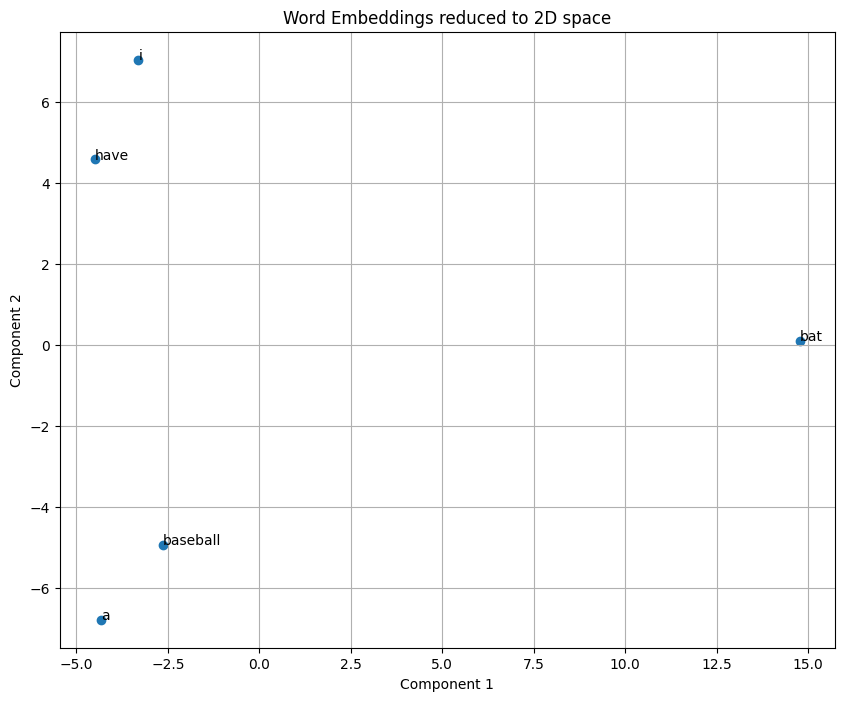

In [ ]:
# Create a PCA object to reduce to 2 dimensions
pca = PCA(n_components=2)

# Fit and transform the embeddings using PCA
reduced_embeddings = pca.fit_transform(embeddings1[2:7])

# Plot the reduced embeddings
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# Annotate the points with the words
words = ["i", "have", "a", "baseball", "bat"]

for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title('Word Embeddings reduced to 2D space')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()


We now tokenize the second set of words such that we are also able to get their positions

In [ ]:
# Tokenize the sentence
sentence = "the bat flew by"
inputs = tokenizer(sentence, return_tensors="pt", add_special_tokens=True)

# Get the token IDs (input to the model)
input_ids = inputs['input_ids']

# Forward pass through BERT to get the embeddings
with torch.no_grad():
    outputs = model(input_ids)

# The last_hidden_state is the embeddings for the last layer
# It has shape [batch_size, sequence_length, hidden_size], where hidden_size is 768 for BERT base
embeddings2 = outputs.last_hidden_state.squeeze(0)  # Remove the batch dimension

# Now, `embeddings` contains the embeddings for each token in the sentence


Using PCA we are now able to plot the positions in two dimensions to get a visual idea of how the words are positioned compared to each other

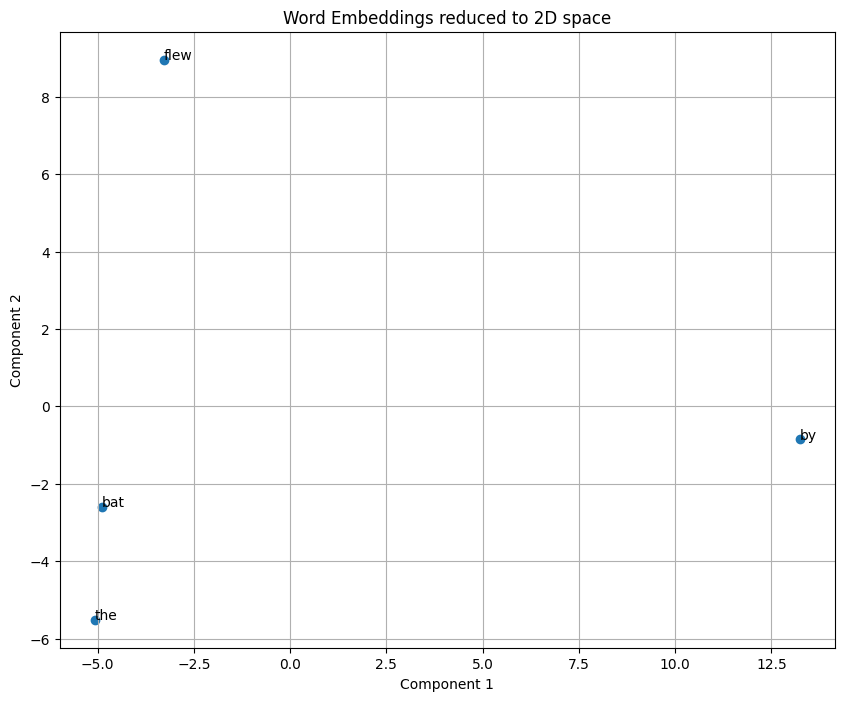

In [ ]:
# Create a PCA object to reduce to 2 dimensions
pca = PCA(n_components=2)

# Fit and transform the embeddings using PCA
reduced_embeddings = pca.fit_transform(embeddings2[2:6])

# Plot the reduced embeddings
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# Annotate the points with the words
words = ["the", "bat", "flew", "by"]

for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title('Word Embeddings reduced to 2D space')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

After having gotten the embedding positions of all of the words, we are now able to put all of the positions into a single dictionary.

We do this such that we are able to perform the necessary calculations later on.

In [ ]:
embeddings3 = {
    "i": embeddings1[2].numpy(),
    "have": embeddings1[3].numpy(),
    "a": embeddings1[4].numpy(),
    "baseball": embeddings1[5].numpy(),
    "bat": embeddings1[6].numpy(),
    "the": embeddings2[2].numpy(),
    "flew": embeddings2[4].numpy(),
    "by": embeddings2[5].numpy()
}

#We have picked the embedding for bat from the first sentence, due to not being able to make an average of the positions from both sentences
# We are aware that this is not fully correct, though we proceed knowing this.

After having placed the individual positions into a dictionary, we can now plot all of the individual words together in a single 2D plot.

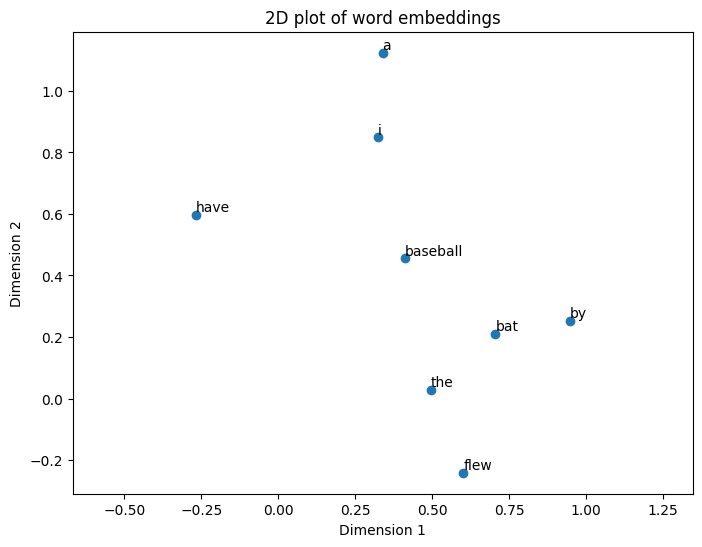

In [ ]:
# Extract the coordinates for 2D plotting
x_2d_adj = [embeddings3[word][0] for word in embeddings3]
y_2d_adj = [embeddings3[word][1] for word in embeddings3]
words_2d_adj = list(embeddings3.keys())

# Create a 2D plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter the points
ax.scatter(x_2d_adj, y_2d_adj)

# Annotate the points with words
for i, word in enumerate(words_2d_adj):
    ax.text(x_2d_adj[i], y_2d_adj[i] + 0.01, word)  # Adjust text position for clarity

# Set labels
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('2D plot of word embeddings')

# Set equal scaling
ax.axis('equal')

# Show the plot
plt.show()


We can see that "baseball" is positioned closer to bat than "flew" is in this case.

After having taken a look at the positions of the words, we can now calculate our attention output

In [ ]:
# Sentence 1
sentence_1 = ["i", "have", "a", "baseball", "bat"]

# Initialize matrices for Q, K, V
Q_1 = np.array([embeddings3[word] for word in sentence_1])
K_1 = np.array([embeddings3[word] for word in sentence_1])
V_1 = np.array([embeddings3[word] for word in sentence_1])

# Step 1: Similarity - Calculate dot products for Q and K (attention scores)
attention_scores_1 = Q_1.dot(K_1.T)

# Step 2: Weights - Apply softmax to attention scores
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

attention_weights_1 = np.apply_along_axis(softmax, 1, attention_scores_1)

# Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors
attention_output_1 = attention_weights_1.dot(V_1)

In [ ]:
attention_output_1

array([[ 0.32324398,  0.84930605,  0.03585996, ..., -0.2362689 ,
         0.20298937,  0.12330541],
       [-0.26814216,  0.5969628 ,  0.03591495, ..., -0.41512454,
        -0.17542687,  0.3565664 ],
       [ 0.33890572,  1.1239358 , -0.6009588 , ..., -0.39115927,
         0.0121437 , -0.34908897],
       [ 0.41243416,  0.45540193, -0.45732698, ...,  0.40431407,
         0.20579253, -0.37224326],
       [ 0.7054035 ,  0.21011114, -0.30957484, ...,  0.2409946 ,
        -0.4986839 , -0.31831604]], dtype=float32)

The results does not tell us much about the actual output, therefore we need to plot it for a better idea of what this all means

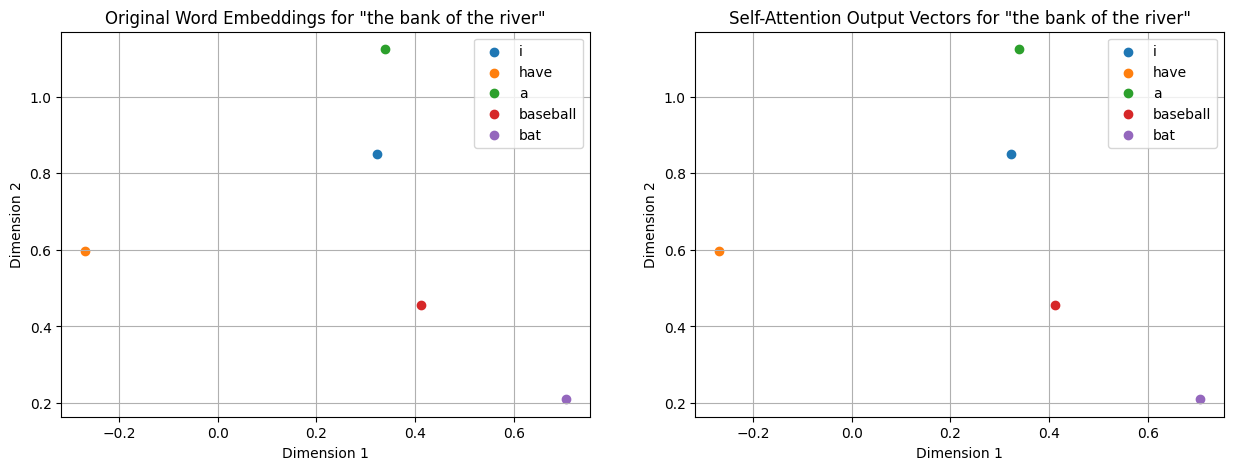

In [ ]:
# Plotting the original embeddings and the attention output for the first sentence "i have a baseball bat"

# Extract the relevant embeddings for the first sentence
sentence_embeddings_1 = np.array([embeddings3[word] for word in sentence_1])

# Convert the attention output for the first sentence to a numpy array for ease of use
attention_output_array_1 = np.array(attention_output_1)

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original embeddings
for i, word in enumerate(sentence_1):
    axes[0].scatter(sentence_embeddings_1[i, 0], sentence_embeddings_1[i, 1], label=f"{word}")

axes[0].set_title('Original Word Embeddings for "the bank of the river"')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True)
axes[0].legend()

# Plot output vectors
for i, word in enumerate(sentence_1):
    axes[1].scatter(attention_output_array_1[i, 0], attention_output_array_1[i, 1], label=f"{word}")

axes[1].set_title('Self-Attention Output Vectors for "the bank of the river"')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True)
axes[1].legend()

plt.show()


After having plotted the original word embedding up against the Self-Attention output vector, we can see that the position of all of the words are the same.

We assume this happens due to having use Bert for word embedding. Were we to use a manual approach to embedding the individual words, we would see that the positions in the Self-Attention Output Vector would change and be more alligned with the way Bert is embedding words.